In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [34]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [35]:
np.random.seed(42)

x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [36]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2Score: {r2_score}") 

Coef: [9.1181022]
Intercept: -34.662307438406785
R2Score: 0.4584649934303068


In [37]:
def plot_regressor(regr, x_test, y_test):
    lower_bound = np.min(x) -1
    upper_bound = np.max(x) +1
    x_points = np.array([lower_bound, upper_bound])
    print(x_points.shape)
    x_points = np.reshape(x_points, (-1,1))
    print(x_points.shape)
    y_pred = regr.predict(x_points)
    y1, y2 = y_pred
    plt.plot((lower_bound, upper_bound), (y1, y2), color="black")
    plt.scatter(x_test, y_test, color="red")
    plt.show()

(2,)
(2, 1)


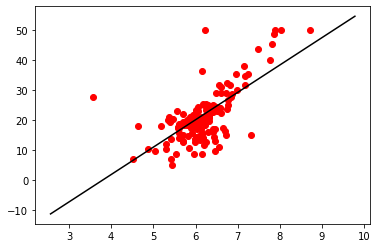

In [38]:
plot_regressor(regr, x_test, y_test)

In [39]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    #differenzen von der prediction zum wahren wert
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = min(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

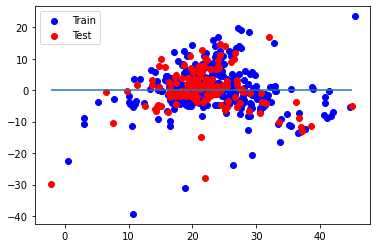

In [40]:
plot_residuals(regr, x_train,y_train, x_test, y_test)